Data : https://www.kaggle.com/datasets/haezer/french-baby-names

In [ ]:
# exemple command shell
!pwd

/content


Préparation des données




In [4]:
import pandas as pd

In [5]:
! rm -r sample_data/

rm: cannot remove 'sample_data/': No such file or directory


In [6]:
! ls -halt

total 1.2M
drwxr-xr-x 1 root root 4.0K May 21 12:35 .
-rw-r--r-- 1 root root 1.0M May 21 12:35 national_names.csv
-rw-r--r-- 1 root root 130K May 21 12:34 planning.PNG
drwxr-xr-x 1 root root 4.0K May 21 12:02 ..
drwxr-xr-x 4 root root 4.0K May 17 13:36 .config


In [7]:
df = pd.read_csv("/content/national_names.csv")
df

,year,name,sex,count
0,1900,Abeline,F,3.0
1,1900,Abelle,F,3.0
2,1900,Ada,F,4.0
3,1900,Adelaide,F,194.0
4,1900,Adèle,F,661.0
...,...,...,...,...
59149,1929,Rudolph,M,3.0
59150,1929,Rudolphe,M,9.0
59151,1929,Ruffin,M,5.0
59152,1929,Rufin,M,6.0


In [8]:
df = df.groupby('name', as_index=False).agg({'count': 'sum'})
df = df[df['count'] >= 50]
df['name'] = df['name'].str.lower()
df = df.sample(frac=1.0)
df = df[:100]

df

,name,count
1015,diana,114.0
688,camille,56272.0
105,albertina,62.0
1410,fabien,679.0
2647,ludger,168.0
...,...,...
3190,nicolette,216.0
1322,ernesta,79.0
862,clotaire,2359.0
126,aldo,678.0


In [9]:
names = df['name'].to_list()
names

['diana',
 'camille',
 'albertina',
 'fabien',
 'ludger',
 'lyliane',
 'czeslawa',
 'gertrude',
 'manon',
 'marcella',
 'benjamin',
 'damien',
 'fernande',
 'jehan',
 'philogone',
 'stella',
 'theobald',
 'raphaele',
 'jean-antoine',
 'amelina',
 'ramsamy',
 'gilda',
 'elisabeth',
 'viviane',
 'martial',
 'sylvain',
 'jeane',
 'colbert',
 'bernadette',
 'rachelle',
 'jean-baptiste',
 'berengere',
 'roger',
 'lino',
 'vincine',
 'helyett',
 'marie-magdeleine',
 'siegfried',
 'emmy',
 'sosthene',
 'gilette',
 'reymond',
 'agenor',
 'boleslaw',
 'remond',
 'amalie',
 'joachim',
 'angel',
 'adonis',
 'ginette',
 'samson',
 'manuel',
 'ingeborg',
 'agnan',
 'magali',
 'vladimir',
 'ulysse',
 'manuelle',
 'modestine',
 'anatolie',
 'josephin',
 'celenie',
 'celestin',
 'pol',
 'violette',
 'andoche',
 'court',
 'scholastie',
 'adhemar',
 'amelius',
 'isidorine',
 'gastonne',
 'pie',
 'fulbert',
 'homere',
 'tosca',
 'rémy',
 'armide',
 'annelise',
 'gustavie',
 'vicente',
 'renée',
 'gonzagu

In [10]:
len(names)

100

In [11]:
max(len(name) for name in names)

16

Calcul de la probalité de la lettre suivante : bigramme

In [12]:
#bigrams
bigrams = {}

for name in names[:100]:
  name = ['.']+list(name)+['.']
  print(name)
  for l1, l2 in zip(name, name[1:]):
    bigram = (l1, l2)
    bigrams[bigram] = bigrams.get(bigram, 0)+1
    print(l1, l2)

['.', 'd', 'i', 'a', 'n', 'a', '.']
. d
d i
i a
a n
n a
a .
['.', 'c', 'a', 'm', 'i', 'l', 'l', 'e', '.']
. c
c a
a m
m i
i l
l l
l e
e .
['.', 'a', 'l', 'b', 'e', 'r', 't', 'i', 'n', 'a', '.']
. a
a l
l b
b e
e r
r t
t i
i n
n a
a .
['.', 'f', 'a', 'b', 'i', 'e', 'n', '.']
. f
f a
a b
b i
i e
e n
n .
['.', 'l', 'u', 'd', 'g', 'e', 'r', '.']
. l
l u
u d
d g
g e
e r
r .
['.', 'l', 'y', 'l', 'i', 'a', 'n', 'e', '.']
. l
l y
y l
l i
i a
a n
n e
e .
['.', 'c', 'z', 'e', 's', 'l', 'a', 'w', 'a', '.']
. c
c z
z e
e s
s l
l a
a w
w a
a .
['.', 'g', 'e', 'r', 't', 'r', 'u', 'd', 'e', '.']
. g
g e
e r
r t
t r
r u
u d
d e
e .
['.', 'm', 'a', 'n', 'o', 'n', '.']
. m
m a
a n
n o
o n
n .
['.', 'm', 'a', 'r', 'c', 'e', 'l', 'l', 'a', '.']
. m
m a
a r
r c
c e
e l
l l
l a
a .
['.', 'b', 'e', 'n', 'j', 'a', 'm', 'i', 'n', '.']
. b
b e
e n
n j
j a
a m
m i
i n
n .
['.', 'd', 'a', 'm', 'i', 'e', 'n', '.']
. d
d a
a m
m i
i e
e n
n .
['.', 'f', 'e', 'r', 'n', 'a', 'n', 'd', 'e', '.']
. f
f e
e r
r n
n a
a 

In [13]:
bigrams

{('.', 'd'): 2,
 ('d', 'i'): 2,
 ('i', 'a'): 4,
 ('a', 'n'): 22,
 ('n', 'a'): 8,
 ('a', '.'): 10,
 ('.', 'c'): 8,
 ('c', 'a'): 2,
 ('a', 'm'): 9,
 ('m', 'i'): 5,
 ('i', 'l'): 4,
 ('l', 'l'): 6,
 ('l', 'e'): 13,
 ('e', '.'): 45,
 ('.', 'a'): 16,
 ('a', 'l'): 6,
 ('l', 'b'): 3,
 ('b', 'e'): 8,
 ('e', 'r'): 13,
 ('r', 't'): 6,
 ('t', 'i'): 6,
 ('i', 'n'): 16,
 ('.', 'f'): 3,
 ('f', 'a'): 1,
 ('a', 'b'): 4,
 ('b', 'i'): 1,
 ('i', 'e'): 12,
 ('e', 'n'): 9,
 ('n', '.'): 11,
 ('.', 'l'): 5,
 ('l', 'u'): 1,
 ('u', 'd'): 2,
 ('d', 'g'): 1,
 ('g', 'e'): 8,
 ('r', '.'): 6,
 ('l', 'y'): 3,
 ('y', 'l'): 2,
 ('l', 'i'): 9,
 ('n', 'e'): 14,
 ('c', 'z'): 1,
 ('z', 'e'): 2,
 ('e', 's'): 5,
 ('s', 'l'): 3,
 ('l', 'a'): 9,
 ('a', 'w'): 3,
 ('w', 'a'): 2,
 ('.', 'g'): 7,
 ('t', 'r'): 1,
 ('r', 'u'): 1,
 ('d', 'e'): 6,
 ('.', 'm'): 8,
 ('m', 'a'): 12,
 ('n', 'o'): 3,
 ('o', 'n'): 10,
 ('a', 'r'): 7,
 ('r', 'c'): 2,
 ('c', 'e'): 5,
 ('e', 'l'): 17,
 ('.', 'b'): 6,
 ('n', 'j'): 1,
 ('j', 'a'): 1,
 ('d', 'a')

In [14]:
sorted(bigrams.items(), key = lambda kv:-1*kv[1]) #tri en fonction du compte

[(('e', '.'), 45),
 (('a', 'n'), 22),
 (('e', 'l'), 17),
 (('.', 'a'), 16),
 (('i', 'n'), 16),
 (('n', 'e'), 14),
 (('l', 'e'), 13),
 (('e', 'r'), 13),
 (('i', 'e'), 12),
 (('m', 'a'), 12),
 (('n', '.'), 11),
 (('a', '.'), 10),
 (('o', 'n'), 10),
 (('s', 't'), 10),
 (('a', 'm'), 9),
 (('e', 'n'), 9),
 (('l', 'i'), 9),
 (('l', 'a'), 9),
 (('n', 'a'), 8),
 (('.', 'c'), 8),
 (('b', 'e'), 8),
 (('g', 'e'), 8),
 (('.', 'm'), 8),
 (('.', 'j'), 8),
 (('t', 'e'), 8),
 (('.', 'r'), 8),
 (('r', 'e'), 8),
 (('.', 'g'), 7),
 (('a', 'r'), 7),
 (('e', 't'), 7),
 (('o', 'l'), 7),
 (('l', 'l'), 6),
 (('a', 'l'), 6),
 (('r', 't'), 6),
 (('t', 'i'), 6),
 (('r', '.'), 6),
 (('d', 'e'), 6),
 (('.', 'b'), 6),
 (('j', 'e'), 6),
 (('.', 's'), 6),
 (('h', 'e'), 6),
 (('i', 's'), 6),
 (('v', 'i'), 6),
 (('t', 't'), 6),
 (('a', 'g'), 6),
 (('m', 'i'), 5),
 (('.', 'l'), 5),
 (('e', 's'), 5),
 (('c', 'e'), 5),
 (('n', 'd'), 5),
 (('.', 'p'), 5),
 (('h', 'i'), 5),
 (('e', 'a'), 5),
 (('.', 'v'), 5),
 (('l', '.'), 

In [15]:
import torch

In [16]:
torch.zeros((3,5), dtype = torch.int32)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [26]:
chars = sorted(list(set(''.join(names))))
len(chars)
nb_chars =len(chars)+1

In [18]:
N = torch.zeros((nb_chars, nb_chars), dtype= torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 

In [19]:
char_to_index = {s:i for i,s in enumerate(chars)}
char_to_index['.'] = 0
char_to_index

{'-': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'r': 16,
 's': 17,
 't': 18,
 'u': 19,
 'v': 20,
 'w': 21,
 'y': 22,
 'z': 23,
 'é': 24,
 '.': 0}

In [20]:
for name in names:
  name = ['.']+list(name)+['.']
  for l1,l2 in zip(name, name[1:]):
    ix1 = char_to_index[l1]
    ix2 = char_to_index[l2]

    N[ix1, ix2] += 1

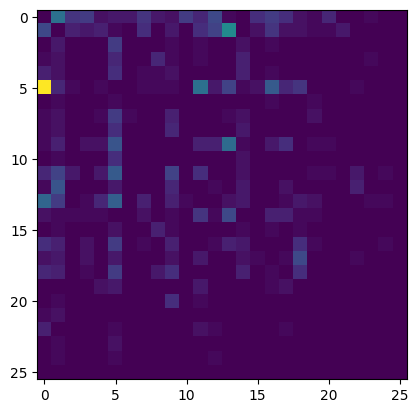

In [21]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [28]:
index_to_char = {i:c for c,i in char_to_index.items()}
len(index_to_char)

25

KeyError: 25

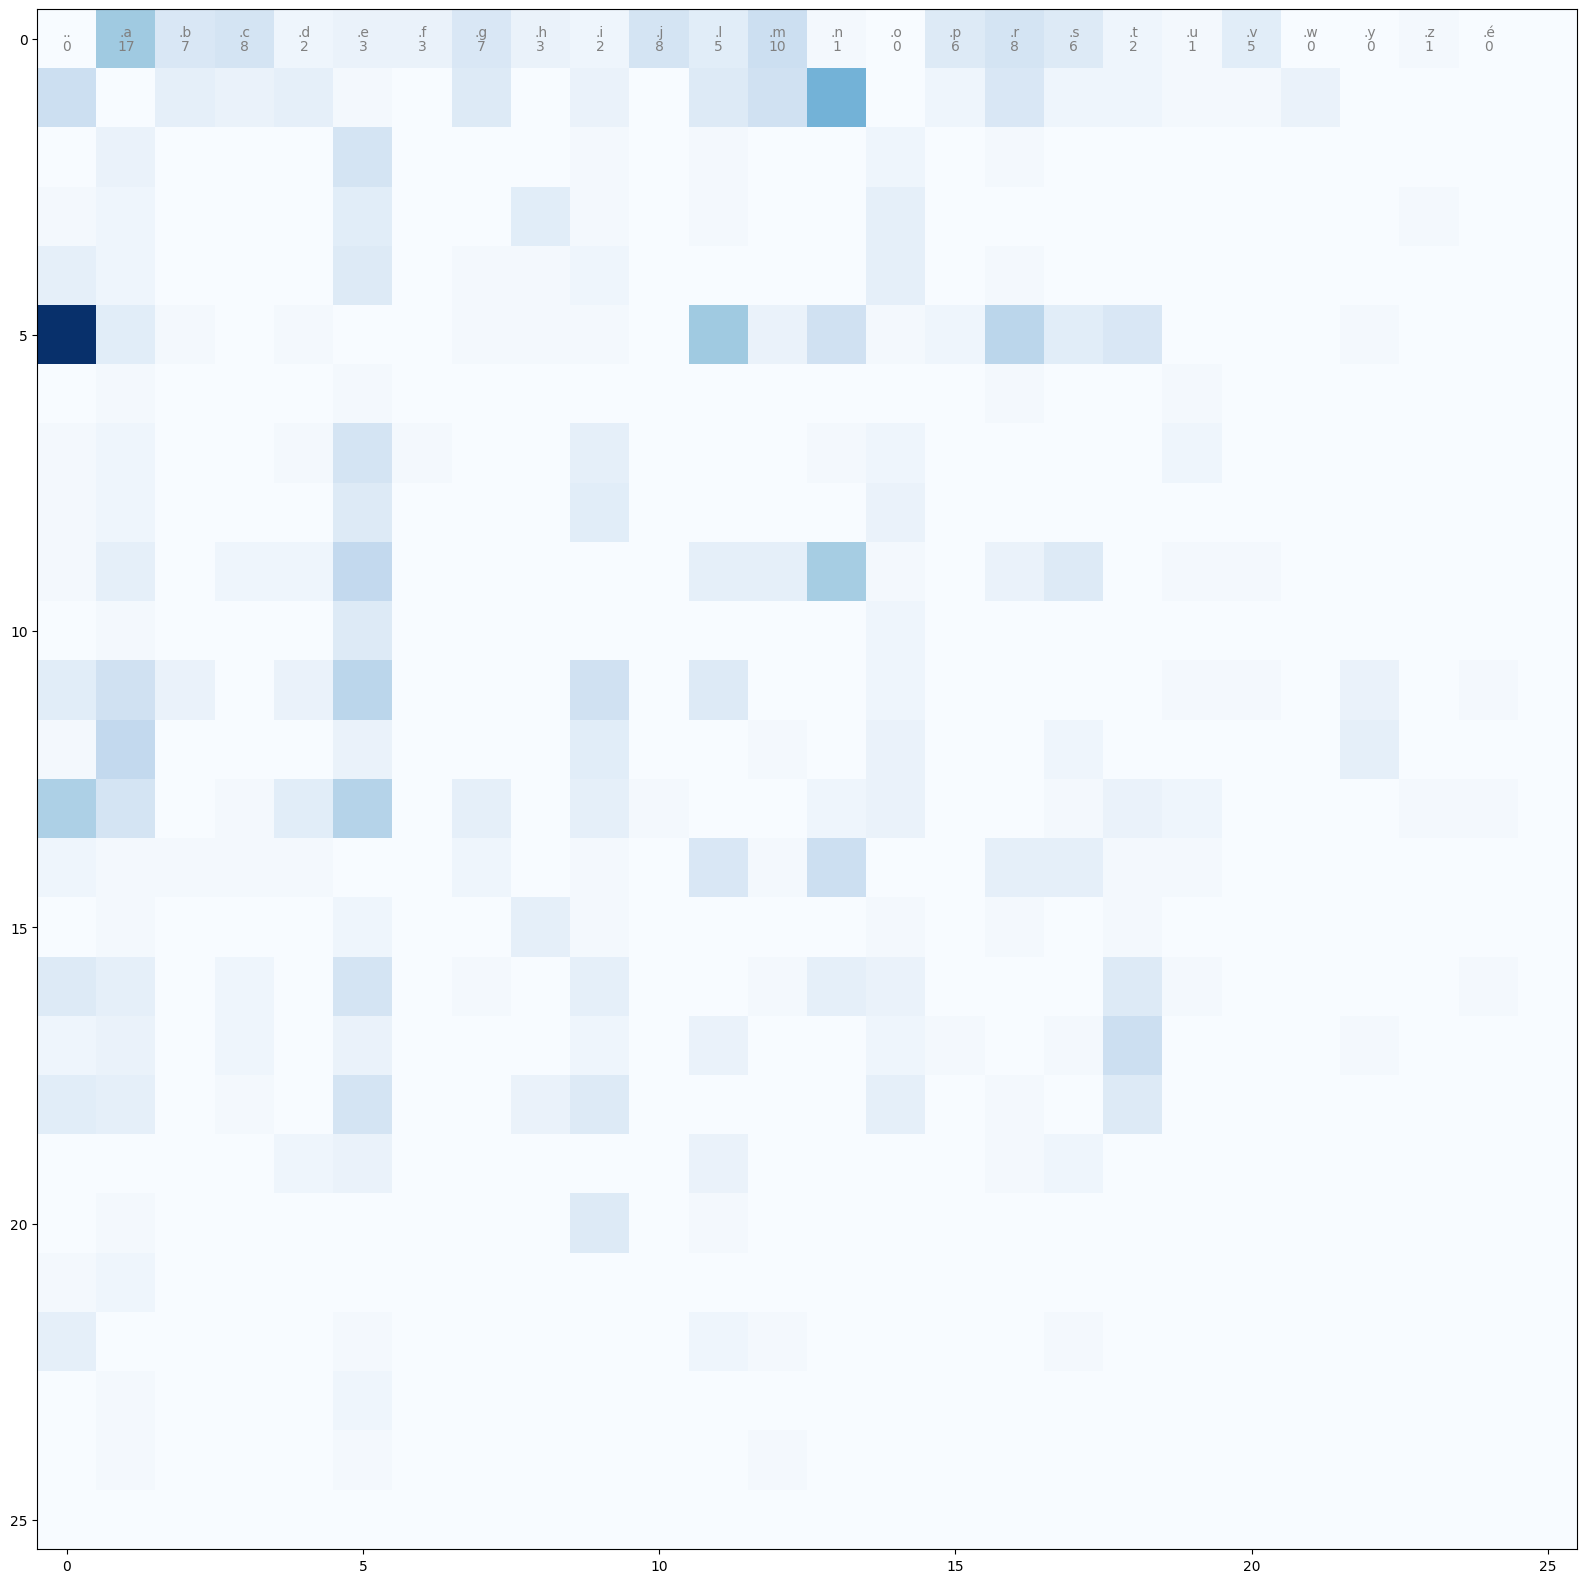

In [25]:
# On affiche une "cartographie" des bigrammes
# On voit que les lettres de A à Z sont plus présentes que les lettres accentuées
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')

for i in range(nb_chars):
    for j in range(nb_chars):
        chstr = index_to_char[i] + index_to_char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
char_to_index['a']

1

In [ ]:
N[1]

tensor([27,  0,  2,  0,  3,  0,  3,  1,  0,  2,  1,  2, 10,  4, 24,  1,  0,  1,
         8,  2,  1,  2,  3,  1,  1,  6,  1,  0,  0,  2,  0], dtype=torch.int32)

In [ ]:
N[1].sum()

tensor(108)

In [ ]:
p = N[1]/N[1].sum()
p

tensor([0.2500, 0.0000, 0.0185, 0.0000, 0.0278, 0.0000, 0.0278, 0.0093, 0.0000,
        0.0185, 0.0093, 0.0185, 0.0926, 0.0370, 0.2222, 0.0093, 0.0000, 0.0093,
        0.0741, 0.0185, 0.0093, 0.0185, 0.0278, 0.0093, 0.0093, 0.0556, 0.0093,
        0.0000, 0.0000, 0.0185, 0.0000])

In [ ]:
# genere 3 nombre aléatoire de la meme maniere d'une execution a l'autre
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p/p.sum()
p


tensor([0.4047, 0.4197, 0.1756])

In [ ]:
torch.multinomial(p, num_samples= 10, replacement=True, generator=g)

tensor([0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
torch.multinomial?

## Generation de texte a aprtir de ces compteurs de bigrammes

In [ ]:
g = torch.Generator().manual_seed(42)
ix = torch.multinomial(p, num_samples= 1, replacement=True, generator=g).item()

index_to_char[ix]

'.'

Fait une boucle pour créer des mots

In [ ]:
g = torch.Generator().manual_seed(42)
for i in range(5):
  ix = 0  #indice du caractere de départ
  out = []

  while True:
    p = N[ix]
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    #print(index_to_char[ix])
    out.append(index_to_char[ix])
    if ix ==0:
      break
  print(''.join(out))

me.
sa.
havilie.
déle.
mic.


Optimisation : supprime la somme et l'integre dans le tableau

In [ ]:
N.sum(dim =1, keepdim=True)

tensor([[104],
        [108],
        [ 10],
        [  9],
        [ 20],
        [ 57],
        [ 10],
        [  8],
        [ 22],
        [ 57],
        [  5],
        [  9],
        [ 43],
        [ 28],
        [ 47],
        [ 31],
        [  3],
        [  3],
        [ 33],
        [ 33],
        [ 20],
        [ 19],
        [  7],
        [  3],
        [  2],
        [ 23],
        [  7],
        [  1],
        [  7],
        [  2],
        [  0]])

In [ ]:
P = N
P = P/P.sum(dim =1, keepdim=True)
P

tensor([[0.0000, 0.1058, 0.0481, 0.0288, 0.0577, 0.0288, 0.0288, 0.0096, 0.0385,
         0.0192, 0.0192, 0.0385, 0.0769, 0.1635, 0.0385, 0.0481, 0.0192, 0.0000,
         0.0385, 0.1058, 0.0481, 0.0000, 0.0000, 0.0096, 0.0000, 0.0000, 0.0192,
         0.0000, 0.0096, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.0185, 0.0000, 0.0278, 0.0000, 0.0278, 0.0093, 0.0000,
         0.0185, 0.0093, 0.0185, 0.0926, 0.0370, 0.2222, 0.0093, 0.0000, 0.0093,
         0.0741, 0.0185, 0.0093, 0.0185, 0.0278, 0.0093, 0.0093, 0.0556, 0.0093,
         0.0000, 0.0000, 0.0185, 0.0000],
        [0.1000, 0.2000, 0.0000, 0.0000, 0.1000, 0.2000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3000, 0.0000, 0.0000,
         0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.1111, 0.2222, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4444,
         0.1111, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1111,

In [ ]:
g = torch.Generator().manual_seed(42)
for i in range(5):
  ix = 0  #indice du caractere de départ
  out = []

  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    #print(index_to_char[ix])
    out.append(index_to_char[ix])
    if ix ==0:
      break
  print(''.join(out))

Mesurer la qualité

In [ ]:
  n=0
  log_likelihood = 0.0
  for name in names[:2]:
    print(name)
    name = ['.']+list(name)+['.']
    for ch1,ch2 in zip(name, name[1:]):
      ix1 = char_to_index[ch1]
      ix2 = char_to_index[ch2]
      n +=1

      prob = P[ix1,ix2]
      logprob = torch.log(prob)
      log_likelihood += logprob
      print(f'{index_to_char[ix1]}{index_to_char[ix2]}: {prob:.3f} {logprob:.3f}')

  print(f'{log_likelihood}')
  nll = -log_likelihood / n
  print(f'{nll}')


abdeljalil
.a: 0.106 -2.246
ab: 0.019 -3.989
bd: 0.100 -2.303
de: 0.250 -1.386
el: 0.105 -2.251
lj: 0.023 -3.761
ja: 0.400 -0.916
al: 0.093 -2.380
li: 0.233 -1.459
il: 0.140 -1.964
l.: 0.070 -2.663
shadé
.s: 0.106 -2.246
sh: 0.091 -2.398
ha: 0.591 -0.526
ad: 0.028 -3.584
dé: 0.050 -2.996
é.: 0.143 -1.946
-39.013145446777344
2.294890880584717


In [ ]:
# evaluation : code du prof
n = 0
log_likelihood = 0.0
for name in names:
  #print(name)
  name = ['.'] + list(name) + ['.']
  for ch1,ch2 in zip(name, name[1:]):
    ix1 = char_to_index[ch1]
    ix2 = char_to_index[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{index_to_char[ix1]}{index_to_char[ix2]}: {prob:.3f} {logprob:.3f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-1571.9635)
nll=tensor(1571.9635)
2.1504287719726562
